<h1>CS 556 Project</h1>

<h2>1. Imports</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
plt.style.use(['ggplot'])
%matplotlib inline
#test

<h2>2. Reading CSV </h2>

In [ ]:
df = pd.read_csv('College_Admissions.csv')
df.head

<h2>3. Data and Distribution</h2>

In [ ]:
datasets = ['GRE Score','CGPA','University Rating']
colors = ['purple', 'green', 'brown']

for dataset,c in zip(datasets,colors):
    plt.hist(df[dataset], bins=30, edgecolor = 'black', color= c)
    plt.title(dataset)
    plt.xlabel(f'{dataset} Distribution')
    plt.ylabel('Count')
    plt.show()

print(df[datasets].describe())

#Calculating correlation matrix
print(df[datasets + ['Chance of Admit ']].corr())



In [ ]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['GRE Score'], df['Chance of Admit '], alpha=0.5)
plt.title('GRE Score vs. Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

plt.subplot(1, 3, 2)
plt.scatter(df['CGPA'], df['Chance of Admit '], alpha=0.5)
plt.title('CGPA vs. Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')

plt.subplot(1, 3, 3)
plt.scatter(df['University Rating'], df['Chance of Admit '], alpha=0.5)
plt.title('University Rating vs. Chance of Admit')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.tight_layout()
plt.show()

<h2>4. Splitting Datasets</h2>

In [ ]:
#Splitting the dataet into a training set and testing set
X = df[datasets]
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>5. Linear Regression Model 1: Without PCA </h2>

In [ ]:
# Train original model
model_original = LinearRegression()
model_original.fit(X_train_scaled, y_train)

# Predict
y_train_pred_original = model_original.predict(X_train_scaled)
y_test_pred_original = model_original.predict(X_test_scaled)

# Calculate MSEs
mse_train_original = mean_squared_error(y_train, y_train_pred_original)
mse_test_original = mean_squared_error(y_test, y_test_pred_original)

print(f'Mean Squared Error (Training) for Original Model: {mse_train_original}')
print(f'Mean Squared Error (Testing) for Original Model: {mse_test_original}')

# Save predictions
original_predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred_original
})
original_predictions_df.to_csv('predictions_original.csv', index=False)


<h2>6. Linear Regression Model 1: With PCA </h2>

In [ ]:
# Applying PCA to reduce the dimensions to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize the PCA-transformed data
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis',edgecolor='k', s=50)
plt.title('PCA of Admission Chances (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Chance of Admit')
plt.grid(True)
plt.show()


<h2>7. Training Linear Regression Models </h2>

In [ ]:
# Train PCA-based model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predict
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

# Calculate MSEs
mse_train_pca = mean_squared_error(y_train, y_train_pred_pca)
mse_test_pca = mean_squared_error(y_test, y_test_pred_pca)

print(f'Mean Squared Error (Training) for PCA Model: {mse_train_pca}')
print(f'Mean Squared Error (Testing) for PCA Model: {mse_test_pca}')


<h2>8. Creating Scatter Plot </h2>

In [ ]:
# Save PCA model predictions
pca_predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred_pca
})
pca_predictions_df.to_csv('predictions_pca.csv', index=False)

# Scatter plot of PCA points in blue and decision boundary in black
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='blue', edgecolor='k', s=40)

# Create a mesh grid to plot decision boundary
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = model_pca.predict(grid_points)
grid_predictions = grid_predictions.reshape(xx.shape)

# Draw contour line where prediction = 0.5
plt.contour(xx, yy, grid_predictions, levels=[0.5], colors='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot with Decision Boundary')
plt.show()

<h2>9. Summary Comparison </h2>

In [ ]:
# Display comparison
print("====== Model Performance Summary ======")
print(f'MSE (Training) Original Model: {mse_train_original}')
print(f'MSE (Testing) Original Model: {mse_test_original}')
print(f'MSE (Training) PCA Model: {mse_train_pca}')
print(f'MSE (Testing) PCA Model: {mse_test_pca}')

if mse_test_pca < mse_test_original:
    print("PCA-based model performed better on test data.")
else:
    print("Original model performed better on test data.")

<h2>Practice</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy import stats

plt.style.use(['ggplot'])
%matplotlib inline

# Load the dataset
df = pd.read_csv('College_Admissions.csv')
print("First few rows of the dataset:")
print(df.head())

# 1. IMPROVED OUTLIER ANALYSIS
# Select features for analysis
datasets = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
target = 'Chance of Admit '

# Comprehensive descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Boxplots to identify outliers
plt.figure(figsize=(14, 8))
df.boxplot(column=datasets)
plt.title('Boxplots to Identify Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Z-score analysis for outlier detection
print("\nOutlier Analysis using Z-scores:")
z_scores = pd.DataFrame()
for feature in datasets:
    z_scores[feature] = stats.zscore(df[feature])

# Print count of potential outliers (|z| > 3)
outlier_counts = (abs(z_scores) > 3).sum()
print("Number of outliers per feature (|z| > 3):")
print(outlier_counts)

# Visualize distribution of three key features with outlier boundaries
selected_features = ['GRE Score', 'CGPA', 'University Rating']
colors = ['purple', 'green', 'brown']

plt.figure(figsize=(18, 5))
for i, (feature, color) in enumerate(zip(selected_features, colors)):
    plt.subplot(1, 3, i+1)
    # Use matplotlib's hist instead of seaborn's histplot
    n, bins, patches = plt.hist(df[feature], bins=30, color=color, alpha=0.7)
    
    # Add a density curve manually
    mu = df[feature].mean()
    sigma = df[feature].std()
    x = np.linspace(df[feature].min(), df[feature].max(), 100)
    y = stats.norm.pdf(x, mu, sigma) * len(df[feature]) * (bins[1] - bins[0])
    plt.plot(x, y, 'k--', linewidth=1.5)
    
    # Mark potential outlier boundaries
    mean = df[feature].mean()
    std = df[feature].std()
    lower_bound = mean - 3*std
    upper_bound = mean + 3*std
    
    plt.axvline(lower_bound, color='red', linestyle='--', alpha=0.7, 
                label=f'Potential outliers (z < -3)')
    plt.axvline(upper_bound, color='red', linestyle='--', alpha=0.7,
                label=f'Potential outliers (z > 3)')
    
    plt.title(f'{feature} Distribution with Outlier Boundaries')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

# Create a heatmap using matplotlib's imshow instead of seaborn's heatmap
im = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im, label='Correlation Coefficient')

# Add correlation values as text annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black" if abs(correlation_matrix.iloc[i, j]) < 0.7 else "white")

plt.title('Correlation Matrix of All Features')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.tight_layout()
plt.show()

# Scatter plots of the three selected features vs Chance of Admit
plt.figure(figsize=(15, 5))
for i, (feature, color) in enumerate(zip(selected_features, colors)):
    plt.subplot(1, 3, i+1)
    plt.scatter(df[feature], df[target], alpha=0.5, color=color)
    
    # Add a best fit line
    x = df[feature].values.reshape(-1, 1)
    y = df[target].values
    model = LinearRegression().fit(x, y)
    x_range = np.linspace(df[feature].min(), df[feature].max(), 100)
    y_pred = model.predict(x_range.reshape(-1, 1))
    plt.plot(x_range, y_pred, color='black', linewidth=2)
    
    plt.title(f'{feature} vs. {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

# Splitting the dataset into a training set and testing set
X = df[selected_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train original model
model_original = LinearRegression()
model_original.fit(X_train_scaled, y_train)

# Predict
y_train_pred_original = model_original.predict(X_train_scaled)
y_test_pred_original = model_original.predict(X_test_scaled)

# Calculate MSEs
mse_train_original = mean_squared_error(y_train, y_train_pred_original)
mse_test_original = mean_squared_error(y_test, y_test_pred_original)

print(f'Mean Squared Error (Training) for Original Model: {mse_train_original:.6f}')
print(f'Mean Squared Error (Testing) for Original Model: {mse_test_original:.6f}')

# Save predictions
original_predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred_original
})
original_predictions_df.to_csv('predictions_original.csv', index=False)

# 2. IMPROVED PCA VISUALIZATION AND REGRESSION SURFACE INSTEAD OF DECISION BOUNDARY

# Applying PCA to reduce the dimensions to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Show explained variance
explained_variance = pca.explained_variance_ratio_
print(f"\nPCA Explained Variance: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance):.4f} or {sum(explained_variance)*100:.2f}%")

# Visualize the PCA-transformed training data with color based on admission chance
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', 
                     edgecolor='k', s=50, alpha=0.7)
plt.colorbar(scatter, label='Chance of Admit')
plt.title('PCA of College Admission Features (Training Data)')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')
plt.grid(True)
plt.show()

# Train PCA-based model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predict
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

# Calculate MSEs
mse_train_pca = mean_squared_error(y_train, y_train_pred_pca)
mse_test_pca = mean_squared_error(y_test, y_test_pred_pca)

print(f'Mean Squared Error (Training) for PCA Model: {mse_train_pca:.6f}')
print(f'Mean Squared Error (Testing) for PCA Model: {mse_test_pca:.6f}')

# Save PCA model predictions
pca_predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred_pca
})
pca_predictions_df.to_csv('predictions_pca.csv', index=False)

# 3. PROPER REGRESSION VISUALIZATION - Create a 3D visualization for regression surface
fig = plt.figure(figsize=(12, 10))

# First subplot: Test data points in blue with regression plane
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_test_pca[:, 0], X_test_pca[:, 1], y_test, color='blue', s=50, alpha=0.7, label='Test Data')

# Create a mesh grid to plot regression surface
x_min, x_max = X_test_pca[:, 0].min() - 0.5, X_test_pca[:, 0].max() + 0.5
y_min, y_max = X_test_pca[:, 1].min() - 0.5, X_test_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = model_pca.predict(grid_points)
zz = grid_predictions.reshape(xx.shape)

# Plot regression surface
surf = ax1.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis', linewidth=0)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5, label='Predicted Admission Chance')

ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Chance of Admission')
ax1.set_title('3D Regression Surface with Test Data')
ax1.legend()

# Second subplot: 2D visualization with contour lines (regression "levels")
ax2 = fig.add_subplot(122)

# Plot test data points
scatter = ax2.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', 
                    edgecolor='k', s=50, alpha=0.7, label='Test Data')
plt.colorbar(scatter, ax=ax2, label='Actual Admission Chance')

# Plot contour lines showing different predicted probability levels
contour = ax2.contour(xx, yy, zz, levels=np.linspace(0.3, 0.9, 7), colors='black', linewidths=1.5)
plt.clabel(contour, inline=True, fontsize=8, fmt='%.2f')

ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('Regression Contour Lines (not decision boundaries)')

plt.tight_layout()
plt.show()

# Display comparison
print("\n====== Model Performance Summary ======")
print(f'MSE (Training) Original Model: {mse_train_original:.6f}')
print(f'MSE (Testing) Original Model: {mse_test_original:.6f}')
print(f'MSE (Training) PCA Model: {mse_train_pca:.6f}')
print(f'MSE (Testing) PCA Model: {mse_test_pca:.6f}')

if mse_test_pca < mse_test_original:
    print("The PCA-based model performed better on test data.")
    difference = (mse_test_original - mse_test_pca) / mse_test_original * 100
    print(f"It showed a {difference:.2f}% improvement in MSE.")
else:
    print("The original model performed better on test data.")
    difference = (mse_test_pca - mse_test_original) / mse_test_original * 100
    print(f"The PCA model had {difference:.2f}% higher MSE.")

# Print model coefficients for interpretation
print("\nOriginal Model Coefficients:")
for feature, coef in zip(selected_features, model_original.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nPCA Model Coefficients:")
for i, coef in enumerate(model_pca.coef_):
    print(f"Principal Component {i+1}: {coef:.4f}")

# Display PCA components for interpretation
print("\nPCA Components:")
for i, component in enumerate(pca.components_):
    print(f"Principal Component {i+1}:")
    for j, feature in enumerate(selected_features):
        print(f"  {feature}: {component[j]:.4f}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
None

First 5 rows:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104               

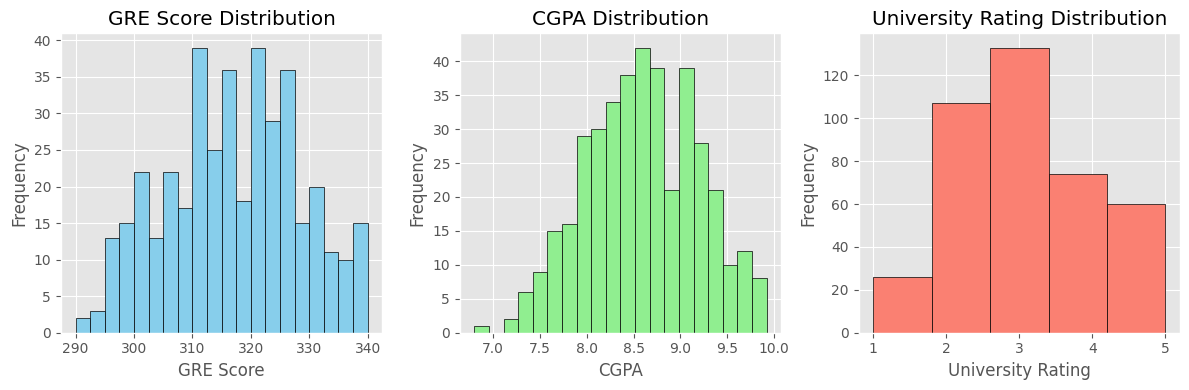


Correlation with Chance of Admit:
Serial No.: 0.0423
GRE Score: 0.8026
TOEFL Score: 0.7916
University Rating: 0.7113
SOP: 0.6757
LOR : 0.6699
CGPA: 0.8733
Research: 0.5532
Chance of Admit : 1.0000


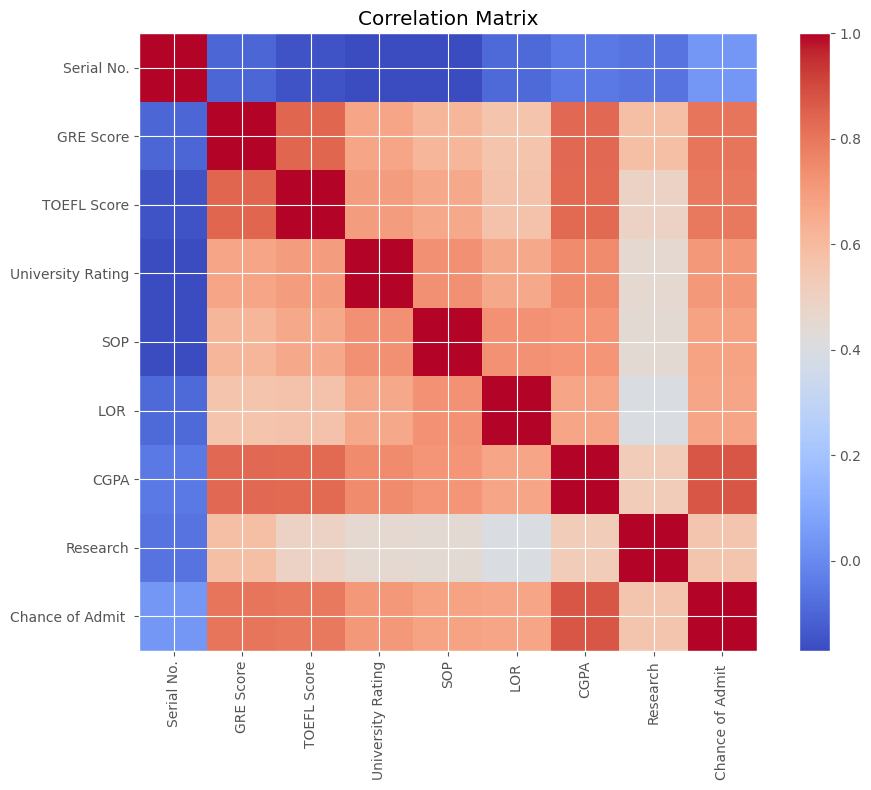

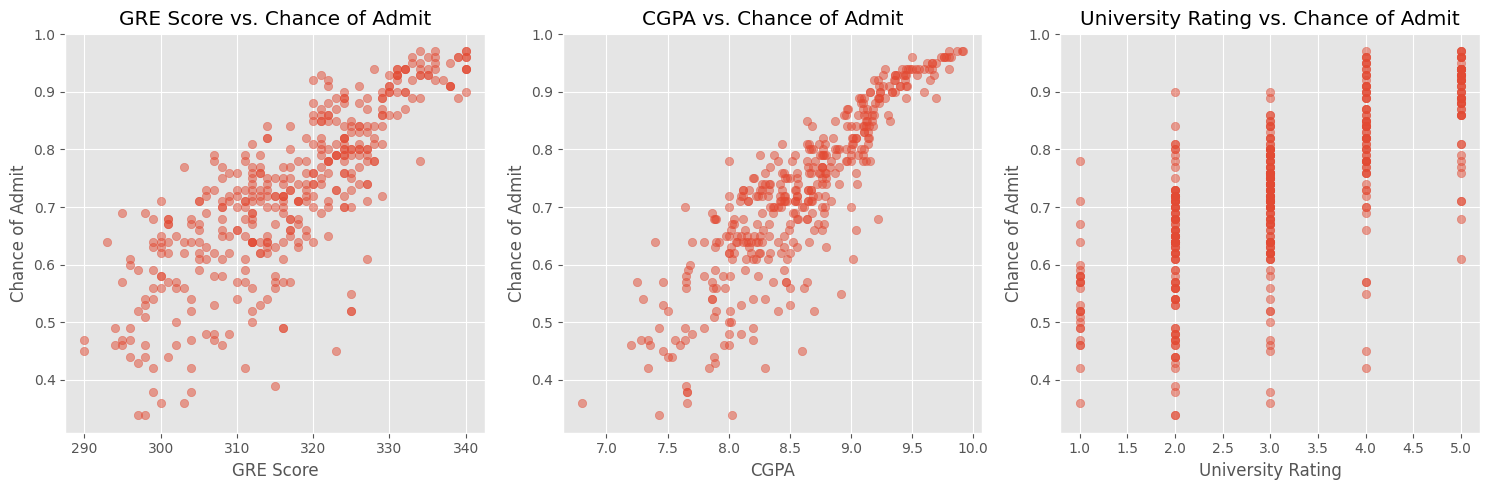


Training set size: 320 samples
Testing set size: 80 samples

--- Model 1: Linear Regression with all features ---
Training MSE: 0.003483
Testing MSE: 0.004617

Feature Coefficients:
             Feature  Coefficient
6               CGPA     0.098635
7           Research     0.021687
5               LOR      0.016574
3  University Rating     0.010820
2        TOEFL Score     0.003549
1          GRE Score     0.001958
4                SOP     0.001943
0         Serial No.     0.000181

--- Model 2: Linear Regression with PCA (2 components) ---
Explained variance ratio: [0.60778263 0.12551536]
Total explained variance: 0.7333
Training MSE: 0.003839
Testing MSE: 0.005212


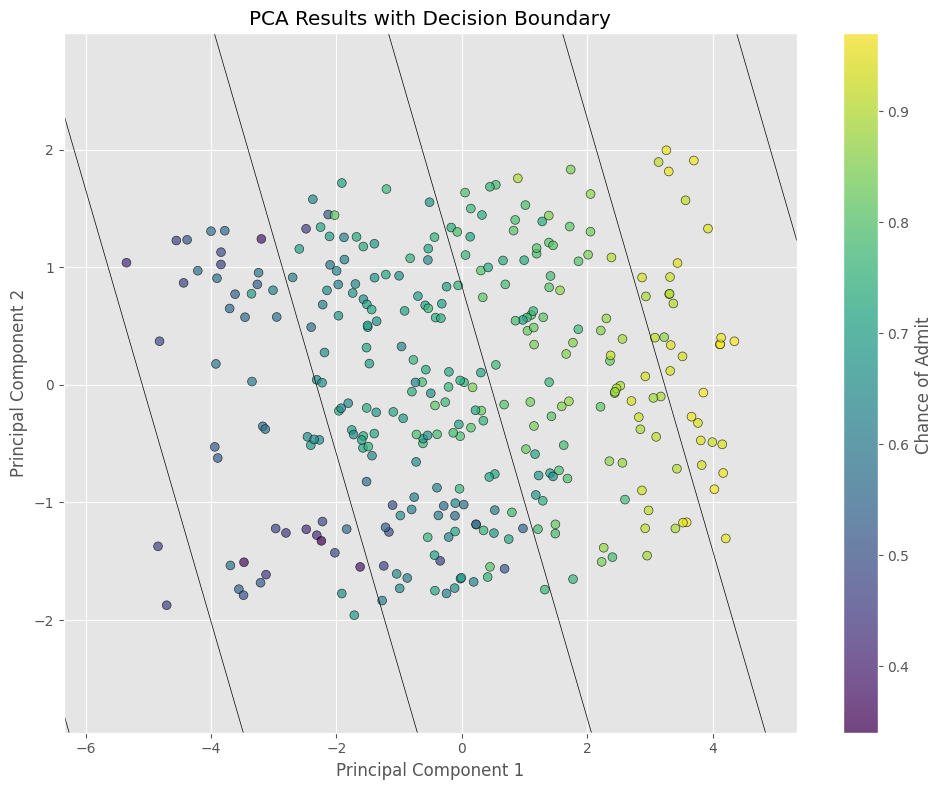


--- Model Comparison ---
Model 1 (All Features) - Training MSE: 0.003483, Testing MSE: 0.004617
Model 2 (PCA) - Training MSE: 0.003839, Testing MSE: 0.005212
Model 2 degraded performance by 12.89%

Conclusion:
Model 1 (using all features) performed better than the PCA model.
This suggests that all features contribute meaningful information for predicting admission chances.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
plt.style.use(['ggplot'])
%matplotlib inline

# Load the dataset
# Note: You'll need to replace 'college_admissions.csv' with your actual file name
data = pd.read_csv('college_admissions.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nBasic statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Feature Analysis - Let's examine three key features
print("\nAnalyzing key features...")

# Feature 1: GRE Score
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data['GRE Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('GRE Score Distribution')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')

# Feature 2: CGPA
plt.subplot(1, 3, 2)
plt.hist(data['CGPA'], bins=20, color='lightgreen', edgecolor='black')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

# Feature 3: University Rating
plt.subplot(1, 3, 3)
plt.hist(data['University Rating'], bins=5, color='salmon', edgecolor='black')
plt.title('University Rating Distribution')
plt.xlabel('University Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation analysis
print("\nCorrelation with Chance of Admit:")
for column in data.columns:
    if column != 'Chance of Admit':
        correlation = data[column].corr(data['Chance of Admit '])
        print(f"{column}: {correlation:.4f}")

# Correlation Matrix Visualization
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter plots of the three selected features vs Chance of Admit
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(data['GRE Score'], data['Chance of Admit '], alpha=0.5, color = 'black')
plt.title('GRE Score vs. Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

plt.subplot(1, 3, 2)
plt.scatter(data['CGPA'], data['Chance of Admit '], alpha=0.5)
plt.title('CGPA vs. Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')

plt.subplot(1, 3, 3)
plt.scatter(data['University Rating'], data['Chance of Admit '], alpha=0.5)
plt.title('University Rating vs. Chance of Admit')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.tight_layout()
plt.show()

# Split features and target
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Model 1: Linear Regression with all features
print("\n--- Model 1: Linear Regression with all features ---")

# Initialize and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

# Calculate MSE
train_mse1 = mean_squared_error(y_train, y_train_pred1)
test_mse1 = mean_squared_error(y_test, y_test_pred1)

print(f"Training MSE: {train_mse1:.6f}")
print(f"Testing MSE: {test_mse1:.6f}")

# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_
})
print("\nFeature Coefficients:")
print(coefficients.sort_values('Coefficient', ascending=False))

# Save predictions to CSV
pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred1
}).to_csv('model1_predictions.csv', index=False)

# Model 2: Linear Regression with PCA (2 components)
print("\n--- Model 2: Linear Regression with PCA (2 components) ---")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# Initialize and train the model
model2 = LinearRegression()
model2.fit(X_train_pca, y_train)

# Make predictions
y_train_pred2 = model2.predict(X_train_pca)
y_test_pred2 = model2.predict(X_test_pca)

# Calculate MSE
train_mse2 = mean_squared_error(y_train, y_train_pred2)
test_mse2 = mean_squared_error(y_test, y_test_pred2)

print(f"Training MSE: {train_mse2:.6f}")
print(f"Testing MSE: {test_mse2:.6f}")

# Save predictions to CSV
pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred2
}).to_csv('model2_predictions.csv', index=False)

# Visualize PCA results with decision boundary
plt.figure(figsize=(10, 8))

# Create a meshgrid for the decision boundary
h = 0.01
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function values for the whole grid
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color plot with the results
plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', 
            edgecolor='k', s=40, alpha=0.7)
plt.colorbar(label='Chance of Admit ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results with Decision Boundary')
plt.tight_layout()
plt.show()

# Compare both models
print("\n--- Model Comparison ---")
print(f"Model 1 (All Features) - Training MSE: {train_mse1:.6f}, Testing MSE: {test_mse1:.6f}")
print(f"Model 2 (PCA) - Training MSE: {train_mse2:.6f}, Testing MSE: {test_mse2:.6f}")

# Calculate improvement or degradation
improvement = (test_mse1 - test_mse2) / test_mse1 * 100
if improvement > 0:
    print(f"Model 2 improved performance by {improvement:.2f}%")
else:
    print(f"Model 2 degraded performance by {abs(improvement):.2f}%")

print("\nConclusion:")
if test_mse1 < test_mse2:
    print("Model 1 (using all features) performed better than the PCA model.")
    print("This suggests that all features contribute meaningful information for predicting admission chances.")
else:
    print("Model 2 (using PCA) performed better than using all features.")
    print("This suggests that dimension reduction effectively captured the essential patterns in the data.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
plt.style.use(['ggplot'])
%matplotlib inline

# Load the dataset
# Note: You'll need to replace 'college_admissions.csv' with your actual file name
data = pd.read_csv('college_admissions.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

# We'll focus on only three features as specified: University Rating, CGPA, and GRE Score
selected_features = ['University Rating', 'CGPA', 'GRE Score']

# Feature Analysis - Examine the three key features
print("\nAnalyzing the three selected features...")

# Feature 1: GRE Score
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data['GRE Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('GRE Score Distribution')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')

# Feature 2: CGPA
plt.subplot(1, 3, 2)
plt.hist(data['CGPA'], bins=20, color='lightgreen', edgecolor='black')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

# Feature 3: University Rating
plt.subplot(1, 3, 3)
plt.hist(data['University Rating'], bins=5, color='salmon', edgecolor='black')
plt.title('University Rating Distribution')
plt.xlabel('University Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Correlation analysis for the three selected features
print("\nCorrelation with Chance of Admit:")
for column in selected_features:
    correlation = data[column].corr(data['Chance of Admit '])
    print(f"{column}: {correlation:.4f}")

# Scatter plots of the three selected features vs Chance of Admit
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(data['GRE Score'], data['Chance of Admit '], alpha=0.5)
plt.title('GRE Score vs. Chance of Admit ')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')

plt.subplot(1, 3, 2)
plt.scatter(data['CGPA'], data['Chance of Admit '], alpha=0.5)
plt.title('CGPA vs. Chance of Admit ')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')

plt.subplot(1, 3, 3)
plt.scatter(data['University Rating'], data['Chance of Admit '], alpha=0.5)
plt.title('University Rating vs. Chance of Admit ')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit ')
plt.tight_layout()
plt.show()

# Select only the three features we're focusing on
X = data[selected_features]
y = data['Chance of Admit ']

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Model 1: Linear Regression with the three selected features
print("\n--- Model 1: Linear Regression with three selected features ---")

# Initialize and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

# Calculate MSE
train_mse1 = mean_squared_error(y_train, y_train_pred1)
test_mse1 = mean_squared_error(y_test, y_test_pred1)

print(f"Training MSE: {train_mse1:.6f}")
print(f"Testing MSE: {test_mse1:.6f}")

# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_
})
print("\nFeature Coefficients:")
print(coefficients.sort_values('Coefficient', ascending=False))

# Save predictions to CSV
pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred1
}).to_csv('model1_predictions.csv', index=False)

# Model 2: Linear Regression with PCA (2 components)
print("\n--- Model 2: Linear Regression with PCA (2 components) ---")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# Component composition
print("\nPCA Components Composition:")
component_df = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2'], 
    index=X.columns
)
print(component_df)

# Initialize and train the model
model2 = LinearRegression()
model2.fit(X_train_pca, y_train)

# Make predictions
y_train_pred2 = model2.predict(X_train_pca)
y_test_pred2 = model2.predict(X_test_pca)

# Calculate MSE
train_mse2 = mean_squared_error(y_train, y_train_pred2)
test_mse2 = mean_squared_error(y_test, y_test_pred2)

print(f"Training MSE: {train_mse2:.6f}")
print(f"Testing MSE: {test_mse2:.6f}")

# Save predictions to CSV
pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred2
}).to_csv('model2_predictions.csv', index=False)

# Visualize PCA results with decision boundary
plt.figure(figsize=(10, 8))

# Create a meshgrid for the decision boundary
h = 0.01
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function values for the whole grid
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color plot with the results
plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', 
            edgecolor='k', s=40, alpha=0.7)
plt.colorbar(label='Chance of Admit')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results with Decision Boundary')
plt.tight_layout()
plt.show()

# Compare both models
print("\n--- Model Comparison ---")
print(f"Model 1 (Three Features) - Training MSE: {train_mse1:.6f}, Testing MSE: {test_mse1:.6f}")
print(f"Model 2 (PCA) - Training MSE: {train_mse2:.6f}, Testing MSE: {test_mse2:.6f}")

# Calculate improvement or degradation
improvement = (test_mse1 - test_mse2) / test_mse1 * 100
if improvement > 0:
    print(f"Model 2 improved performance by {improvement:.2f}%")
else:
    print(f"Model 2 degraded performance by {abs(improvement):.2f}%")

print("\nConclusion:")
if test_mse1 < test_mse2:
    print("Model 1 (using the three features directly) performed better than the PCA model.")
    print("This suggests that the raw features provide more predictive power than the PCA components.")
else:
    print("Model 2 (using PCA) performed better than using the three features directly.")
    print("This suggests that dimension reduction effectively captured the essential patterns in the data.")